Simulate Projectile Motion (No Air Resistance)


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravity (m/s²)
v0 = 40   # initial velocity (m/s)
theta = 60  # launch angle (degrees)

                  Convert Angle to Radians & Calculate Components

In [18]:
theta_rad = np.deg2rad(theta)  # Convert to radians
v0x = v0 * np.cos(theta_rad)   # Horizontal component
v0y = v0 * np.sin(theta_rad)   # Vertical component

                           Define Time Array

In [19]:
t_max = 2 * v0y / g  # Time when projectile hits ground
t = np.linspace(0, t_max, 100)  # 100 time steps

             Compute Position (x, y) Over Time

In [20]:
x = v0x * t
y = v0y * t - 0.5 * g * t**2

               Plot the Trajectory

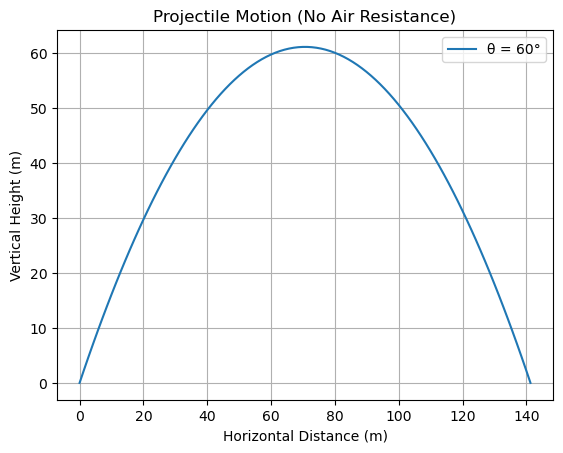

In [21]:

plt.plot(x, y, label=f"θ = {theta}°")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.title("Projectile Motion (No Air Resistance)")
plt.grid()
plt.legend()
plt.show()

Add Air Resistance

In [22]:
from scipy.integrate import odeint

# Additional constants
rho = 1.225  # Air density (kg/m³)
Cd = 0.47    # Drag coefficient (sphere)
A = 0.01     # Cross-sectional area (m²)
m = 0.1      # Mass (kg)



In [23]:
def projectile(y, t):
    x, y, vx, vy = y
    v = np.sqrt(vx**2 + vy**2)
    Fdrag = 0.5 * rho * Cd * A * v**2
    dxdt = vx
    dydt = vy
    dvxdt = -(Fdrag/m) * (vx/v)
    dvydt = -g - (Fdrag/m) * (vy/v)
    return [dxdt, dydt, dvxdt, dvydt]


In [24]:

# Initial conditions [x0, y0, v0x, v0y]
y0 = [0, 0, v0x, v0y]
t = np.linspace(0, 2, 100)
sol = odeint(projectile, y0, t)

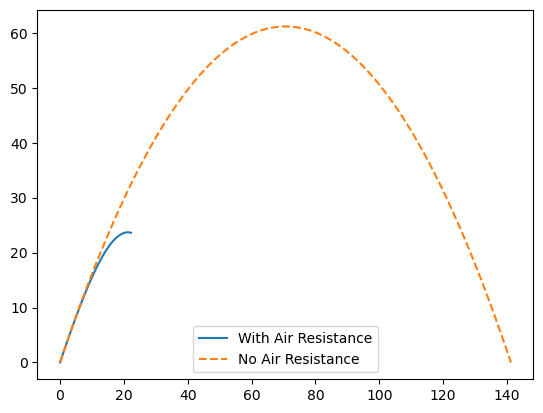

In [25]:

# Plot
plt.plot(sol[:, 0], sol[:, 1], label="With Air Resistance")
plt.plot(x, y, "--", label="No Air Resistance")
plt.legend()
plt.show()